In [49]:
import pandas as pd

df = pd.read_csv('../data/03_casos/df_51_cleaned.csv')

In [50]:
df.head()

,ano,semana,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas,sub_reg_nt,...,defunciones_60mas_lag_3_semana,defunciones_60mas_lag_4_semana,defunciones_60mas_lag_5_semana,defunciones_60mas_lag_6_semana,mes,bimestre,trimestre,cuatrimestre,semestre,pandemia_covid
0,2000,1,105,0,0,0,0,0,0,51,...,0.0,0.0,0.0,0.0,1,1,1,1,1,0
1,2000,2,58,0,0,0,0,0,0,51,...,0.0,0.0,0.0,0.0,1,1,1,1,1,0
2,2000,3,54,0,0,0,0,0,0,51,...,0.0,0.0,0.0,0.0,1,1,1,1,1,0
3,2000,4,44,0,0,0,0,0,0,51,...,0.0,0.0,0.0,0.0,1,1,1,1,1,0
4,2000,6,65,1,0,0,0,0,0,51,...,0.0,0.0,0.0,0.0,2,1,1,1,1,0


In [51]:
df.columns

Index(['ano', 'semana', 'ira_no_neumonia', 'neumonias_men5', 'neumonias_60mas',
       'hospitalizados_men5', 'hospitalizados_60mas', 'defunciones_men5',
       'defunciones_60mas', 'sub_reg_nt', 'ira_no_neumonia_lag_1_semana',
       'ira_no_neumonia_lag_2_semana', 'ira_no_neumonia_lag_3_semana',
       'ira_no_neumonia_lag_4_semana', 'ira_no_neumonia_lag_5_semana',
       'ira_no_neumonia_lag_6_semana', 'neumonias_men5_lag_1_semana',
       'neumonias_men5_lag_2_semana', 'neumonias_men5_lag_3_semana',
       'neumonias_men5_lag_4_semana', 'neumonias_men5_lag_5_semana',
       'neumonias_men5_lag_6_semana', 'neumonias_60mas_lag_1_semana',
       'neumonias_60mas_lag_2_semana', 'neumonias_60mas_lag_3_semana',
       'neumonias_60mas_lag_4_semana', 'neumonias_60mas_lag_5_semana',
       'neumonias_60mas_lag_6_semana', 'hospitalizados_men5_lag_1_semana',
       'hospitalizados_men5_lag_2_semana', 'hospitalizados_men5_lag_3_semana',
       'hospitalizados_men5_lag_4_semana', 'hospitalizad

Vamos a entrenar un mismo modelo de forecasting para la predicción de `hospitalizados_men5`, considerando los siguientes escenarios:

### Por años [2000 a 2023], [2001 a 2023], [2002 a 2023], [2003 a 2023], [2004 a 2023],[2005 a 2023], [2006 a 2023], [2007 a 2023], [2008 a 2023], [2009 a 2023], [2010 a 2023], [2011 a 2023], [2012 a 2023], [2013 a 2023], [2014 a 2023], [2015 a 2023], [2016 a 2023], [2017 a 2023], [2018 a 2023], [2019 a 2023], [2020 a 2023], [2021 a 2023], [2022 a 2023]


- Entrenar usando:  
  **Variables:** `ano`, `semana`  
  **Target:** `hospitalizados_men5`

- Entrenar usando:  
  **Variables:** `ano`, `semana`, `pandemia_covid`  
  **Target:** `hospitalizados_men5`

- Entrenar usando:  
  **Variables:** `ano`, `semana`, `ira_no_neumonia`, `neumonias_men5`, `neumonias_60mas`, `hospitalizados_60mas`, `defunciones_men5`, `defunciones_60mas`  
  **Target:** `hospitalizados_men5`

  - Entrenar usando:  
  **Variables:** `ano`, `semana`, `ira_no_neumonia`, `neumonias_men5`, `neumonias_60mas`, `hospitalizados_60mas`, `defunciones_men5`, `defunciones_60mas`  ,  `pandemia_covid`  
  **Target:** `hospitalizados_men5`



- Entrenar usando:  
  **Variables:** `ano`, `semana`, `ira_no_neumonia`, `neumonias_men5`, `neumonias_60mas`, `hospitalizados_60mas`, `defunciones_men5`, `defunciones_60mas`, y sus variables *lag* (`_lag_1_semana` a `_lag_6_semana`)  ,  `pandemia_covid` 
  **Target:** `hospitalizados_men5`

- Entrenar usando:  
  **Variables:** `ano`, `semana`, `ira_no_neumonia`, `neumonias_men5`, `neumonias_60mas`, `hospitalizados_60mas`, `defunciones_men5`, `defunciones_60mas`, y sus variables *lag* (`_lag_1_semana` a `_lag_6_semana`)  
  **Target:** `hospitalizados_men5`

- Entrenar usando:  
  **Variables:** `ano`, `semana`, `hospitalizados_60mas_lag_1_semana`, `defunciones_men5_lag_1_semana`, `defunciones_60mas_lag_1_semana`, `defunciones_men5_lag_3_semana`   
  **Target:** `hospitalizados_men5`

- Entrenar usando:  
  **Variables:** `ano`, `semana`, `hospitalizados_60mas_lag_1_semana`, `defunciones_men5_lag_1_semana`, `defunciones_60mas_lag_1_semana`, `defunciones_men5_lag_3_semana`   , `pandemia_covid`  
  **Target:** `hospitalizados_men5`



In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## Modelo: CatBoost

Entrenaremos el modelo CatBoost (Gradient Boosting optimizado) para comparar su desempeño en diferentes periodos y conjuntos de variables.

In [53]:
# Diccionario para almacenar resultados de todos los modelos
resultados_modelos = {}

In [54]:
# Definir conjuntos de variables según los criterios especificados
variables_sets = {
    'set1_ano_semana': ['ano', 'semana'],
    
    'set2_con_pandemia': ['ano', 'semana', 'pandemia_covid'],
    
    'set3_principales': ['ano', 'semana', 'ira_no_neumonia', 'neumonias_men5', 'neumonias_60mas',
                         'hospitalizados_60mas', 'defunciones_men5', 'defunciones_60mas'],
    
    'set4_principales_con_pandemia': ['ano', 'semana', 'ira_no_neumonia', 'neumonias_men5', 'neumonias_60mas',
                                      'hospitalizados_60mas', 'defunciones_men5', 'defunciones_60mas', 
                                      'pandemia_covid'],
    
    'set5_con_lags_pandemia': ['ano', 'semana', 'ira_no_neumonia', 'neumonias_men5', 'neumonias_60mas',
                               'hospitalizados_60mas', 'defunciones_men5', 'defunciones_60mas', 
                               'pandemia_covid'],
    
    'set6_con_lags': ['ano', 'semana', 'ira_no_neumonia', 'neumonias_men5', 'neumonias_60mas',
                      'hospitalizados_60mas', 'defunciones_men5', 'defunciones_60mas'],
    
    'set7_lags_selectos': ['ano', 'semana', 'hospitalizados_60mas_lag_1_semana',
                           'defunciones_men5_lag_1_semana', 'defunciones_60mas_lag_1_semana',
                           'defunciones_men5_lag_3_semana'],
    
    'set8_lags_selectos_pandemia': ['ano', 'semana', 'hospitalizados_60mas_lag_1_semana',
                                    'defunciones_men5_lag_1_semana', 'defunciones_60mas_lag_1_semana',
                                    'defunciones_men5_lag_3_semana', 'pandemia_covid']
}

# Agregar variables lag a set5 y set6
lag_vars = []
for var in ['ira_no_neumonia', 'neumonias_men5', 'neumonias_60mas',
            'hospitalizados_60mas', 'defunciones_men5', 'defunciones_60mas']:
    for i in range(1, 7):
        lag_vars.append(f'{var}_lag_{i}_semana')

variables_sets['set5_con_lags_pandemia'].extend(lag_vars)
variables_sets['set6_con_lags'].extend(lag_vars)

print("Conjuntos de variables definidos:")
for key, vars_list in variables_sets.items():
    print(f"\n{key}: {len(vars_list)} variables")
    print(f"  {', '.join(vars_list[:5])}{'...' if len(vars_list) > 5 else ''}")

Conjuntos de variables definidos:

set1_ano_semana: 2 variables
  ano, semana

set2_con_pandemia: 3 variables
  ano, semana, pandemia_covid

set3_principales: 8 variables
  ano, semana, ira_no_neumonia, neumonias_men5, neumonias_60mas...

set4_principales_con_pandemia: 9 variables
  ano, semana, ira_no_neumonia, neumonias_men5, neumonias_60mas...

set5_con_lags_pandemia: 45 variables
  ano, semana, ira_no_neumonia, neumonias_men5, neumonias_60mas...

set6_con_lags: 44 variables
  ano, semana, ira_no_neumonia, neumonias_men5, neumonias_60mas...

set7_lags_selectos: 6 variables
  ano, semana, hospitalizados_60mas_lag_1_semana, defunciones_men5_lag_1_semana, defunciones_60mas_lag_1_semana...

set8_lags_selectos_pandemia: 7 variables
  ano, semana, hospitalizados_60mas_lag_1_semana, defunciones_men5_lag_1_semana, defunciones_60mas_lag_1_semana...


In [55]:
# Definir todos los periodos de años a evaluar
periodos_anos = [
    (2000, 2023), (2001, 2023), (2002, 2023), (2003, 2023), (2004, 2023),
    (2005, 2023), (2006, 2023), (2007, 2023), (2008, 2023), (2009, 2023),
    (2010, 2023), (2011, 2023), (2012, 2023), (2013, 2023), (2014, 2023),
    (2015, 2023), (2016, 2023), (2017, 2023), (2018, 2023), (2019, 2023),
    (2020, 2023), (2021, 2023), (2022, 2023)
]

print(f"Total de periodos a evaluar: {len(periodos_anos)}")
print(f"Desde [{periodos_anos[0][0]}-{periodos_anos[0][1]}] hasta [{periodos_anos[-1][0]}-{periodos_anos[-1][1]}]")

Total de periodos a evaluar: 23
Desde [2000-2023] hasta [2022-2023]


### Entrenamiento de Modelos CatBoost para Todos los Periodos

Se entrenarán modelos CatBoost para cada combinación de periodo y conjunto de variables.

In [56]:
# Entrenar modelos CatBoost para todos los periodos y conjuntos de variables
total_modelos = len(periodos_anos) * len(variables_sets)
contador = 0

print(f"{'='*100}")
print(f"INICIANDO ENTRENAMIENTO DE {total_modelos} MODELOS CATBOOST")
print(f"{'='*100}\n")

for ano_inicio, ano_fin in periodos_anos:
    periodo_label = f"{ano_inicio}-{ano_fin}"
    
    # Preparar datos para el periodo actual
    df_periodo = df[(df['ano'] >= ano_inicio) & (df['ano'] <= ano_fin)].copy()
    df_periodo = df_periodo.sort_values(['ano', 'semana']).reset_index(drop=True)
    
    # Verificar que hay suficientes datos
    if len(df_periodo) < 20:
        print(f"⚠ Periodo {periodo_label}: Datos insuficientes ({len(df_periodo)} obs), omitiendo...")
        continue
    
    y_full = df_periodo['hospitalizados_men5']
    split_idx = int(len(y_full) * 0.8)
    
    print(f"\n{'─'*100}")
    print(f"PERIODO: [{periodo_label}] - {len(df_periodo)} observaciones (Train: {split_idx}, Test: {len(y_full) - split_idx})")
    print(f"{'─'*100}")
    
    for set_name, exog_vars in variables_sets.items():
        contador += 1
        
        # Verificar que todas las variables existen en el dataframe
        vars_disponibles = [v for v in exog_vars if v in df_periodo.columns]
        if len(vars_disponibles) != len(exog_vars):
            vars_faltantes = set(exog_vars) - set(vars_disponibles)
            print(f"  [{contador}/{total_modelos}] ✗ {set_name}: Variables faltantes {vars_faltantes}")
            continue
        
        X = df_periodo[exog_vars]
        y = df_periodo['hospitalizados_men5']
        
        X_train = X[:split_idx]
        X_test = X[split_idx:]
        y_train = y[:split_idx]
        y_test = y[split_idx:]
        
        # Nombre descriptivo del conjunto de variables
        var_desc_map = {
            'set1_ano_semana': 'ano, semana',
            'set2_con_pandemia': 'ano, semana, pandemia_covid',
            'set3_principales': 'principales',
            'set4_principales_con_pandemia': 'principales + pandemia_covid',
            'set5_con_lags_pandemia': 'principales + lags + pandemia_covid',
            'set6_con_lags': 'principales + lags',
            'set7_lags_selectos': 'lags selectos',
            'set8_lags_selectos_pandemia': 'lags selectos + pandemia_covid'
        }
        var_desc = var_desc_map.get(set_name, set_name)
        
        # ==================== CatBoost ====================
        try:
            model_catboost = CatBoostRegressor(
                iterations=500,
                learning_rate=0.05,
                depth=6,
                loss_function='RMSE',
                verbose=False,
                random_state=42
            )
            model_catboost.fit(X_train, y_train)
            pred_catboost = model_catboost.predict(X_test)
            
            mae = mean_absolute_error(y_test, pred_catboost)
            rmse = np.sqrt(mean_squared_error(y_test, pred_catboost))
            r2 = r2_score(y_test, pred_catboost)
            
            resultados_modelos[f'CatBoost_{periodo_label}_{set_name}'] = {
                'periodo': periodo_label,
                'modelo': 'CatBoost',
                'variables': var_desc,
                'MAE': mae,
                'RMSE': rmse,
                'R2': r2
            }
            
            print(f"  [{contador}/{total_modelos}] ✓ {set_name:30} | MAE: {mae:6.3f} | RMSE: {rmse:6.3f} | R²: {r2:7.4f}")
            
        except Exception as e:
            print(f"  [{contador}/{total_modelos}] ✗ Error en {set_name}: {str(e)[:60]}")

print(f"\n{'='*100}")
print(f"ENTRENAMIENTO COMPLETADO")
print(f"Total de modelos entrenados exitosamente: {len(resultados_modelos)}")
print(f"{'='*100}")

INICIANDO ENTRENAMIENTO DE 184 MODELOS CATBOOST


────────────────────────────────────────────────────────────────────────────────────────────────────
PERIODO: [2000-2023] - 1236 observaciones (Train: 988, Test: 248)
────────────────────────────────────────────────────────────────────────────────────────────────────
  [1/184] ✓ set1_ano_semana                | MAE:  4.787 | RMSE:  6.022 | R²: -3.0306
  [2/184] ✓ set2_con_pandemia              | MAE:  5.135 | RMSE:  6.541 | R²: -3.7550
  [3/184] ✓ set3_principales               | MAE:  3.034 | RMSE:  3.668 | R²: -0.4953
  [4/184] ✓ set4_principales_con_pandemia  | MAE:  3.009 | RMSE:  3.685 | R²: -0.5096
  [5/184] ✓ set5_con_lags_pandemia         | MAE:  3.252 | RMSE:  3.955 | R²: -0.7382
  [6/184] ✓ set6_con_lags                  | MAE:  2.960 | RMSE:  3.575 | R²: -0.4207
  [7/184] ✓ set7_lags_selectos             | MAE:  4.865 | RMSE:  6.103 | R²: -3.1394
  [8/184] ✓ set8_lags_selectos_pandemia    | MAE:  5.668 | RMSE:  6.863 | R²: -4

---

## Tabla Comparativa Completa - Resultados por Periodo y Variables

In [57]:
# Crear DataFrame con todos los resultados
df_resultados = pd.DataFrame(resultados_modelos).T
df_resultados = df_resultados.reset_index(drop=True)

# Redondear métricas
df_resultados[['MAE', 'RMSE', 'R2']] = df_resultados[['MAE', 'RMSE', 'R2']].round(4)

# Ordenar resultados por periodo y variables
df_resultados = df_resultados.sort_values(['periodo', 'variables']).reset_index(drop=True)

print("="*120)
print("TABLA COMPARATIVA - MODELOS CATBOOST")
print("="*120)
print("\nTarget: hospitalizados_men5")
print("\nFormato: periodo, modelo, variables, MAE, RMSE, R2")
print("\nColumnas:")
print("  - Periodo: Rango de años utilizado")
print("  - Modelo: CatBoost")
print("  - Variables: Conjunto de variables utilizadas")
print("  - MAE: Mean Absolute Error (menor es mejor)")
print("  - RMSE: Root Mean Squared Error (menor es mejor)")
print("  - R²: Coeficiente de Determinación (mayor es mejor, cercano a 1)")
print("\n" + "="*120)

# Mostrar tabla con el formato especificado
print(df_resultados.to_string(index=True))
print("\n" + "="*120)

TABLA COMPARATIVA - MODELOS CATBOOST

Target: hospitalizados_men5

Formato: periodo, modelo, variables, MAE, RMSE, R2

Columnas:
  - Periodo: Rango de años utilizado
  - Modelo: CatBoost
  - Variables: Conjunto de variables utilizadas
  - MAE: Mean Absolute Error (menor es mejor)
  - RMSE: Root Mean Squared Error (menor es mejor)
  - R²: Coeficiente de Determinación (mayor es mejor, cercano a 1)

       periodo    modelo                            variables       MAE      RMSE        R2
0    2000-2023  CatBoost                          ano, semana  4.787026    6.0221 -3.030569
1    2000-2023  CatBoost          ano, semana, pandemia_covid  5.134629  6.540929 -3.754987
2    2000-2023  CatBoost                        lags selectos  4.864745  6.102872 -3.139415
3    2000-2023  CatBoost       lags selectos + pandemia_covid  5.667882  6.863218 -4.235114
4    2000-2023  CatBoost                          principales   3.03398  3.667999 -0.495302
5    2000-2023  CatBoost                   princ

### Visualización de Resultados

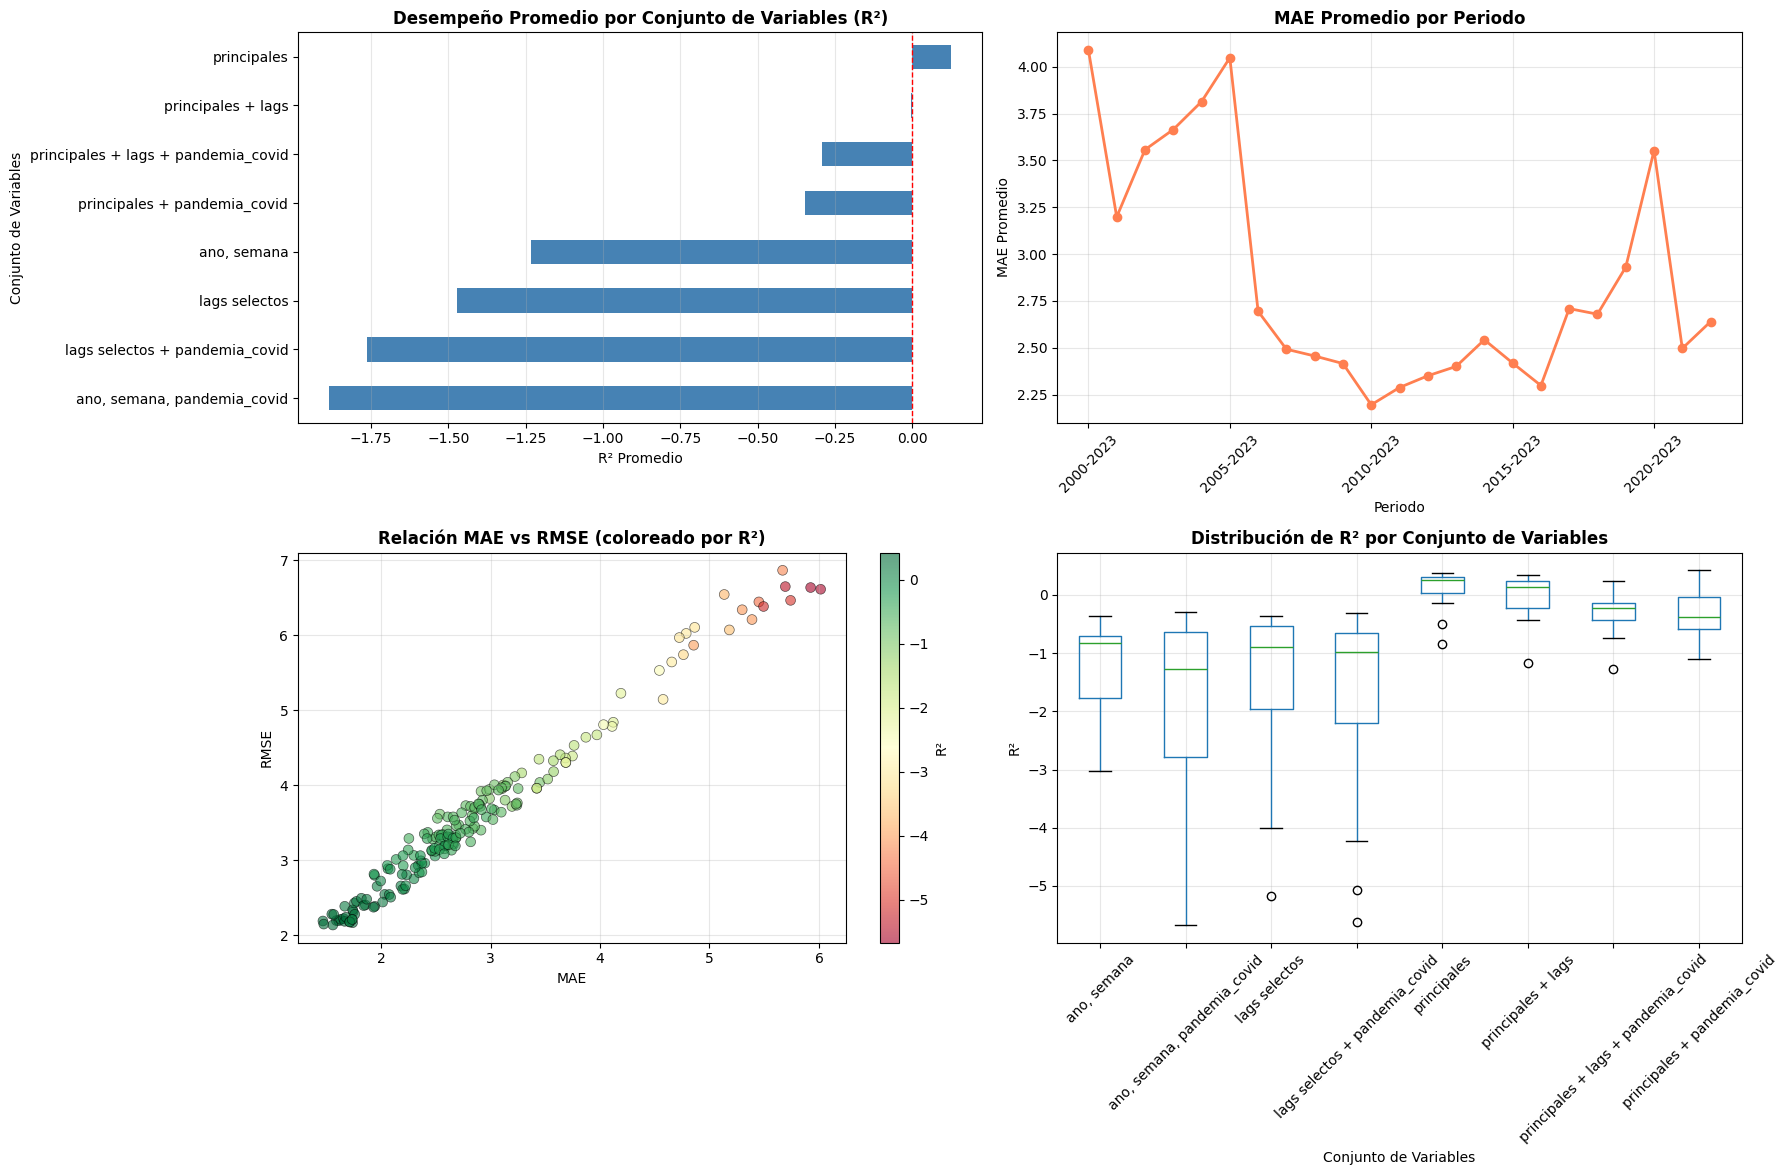

In [58]:
# Visualización 1: R² por periodo y conjunto de variables
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Gráfico 1: R² promedio por conjunto de variables
ax1 = axes[0, 0]
r2_por_vars = df_resultados.groupby('variables')['R2'].mean().sort_values()
r2_por_vars.plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_xlabel('R² Promedio')
ax1.set_ylabel('Conjunto de Variables')
ax1.set_title('Desempeño Promedio por Conjunto de Variables (R²)', fontsize=12, fontweight='bold')
ax1.axvline(x=0, color='red', linestyle='--', linewidth=1)
ax1.grid(axis='x', alpha=0.3)

# Gráfico 2: MAE promedio por periodo
ax2 = axes[0, 1]
mae_por_periodo = df_resultados.groupby('periodo')['MAE'].mean()
mae_por_periodo.plot(kind='line', marker='o', ax=ax2, color='coral', linewidth=2)
ax2.set_xlabel('Periodo')
ax2.set_ylabel('MAE Promedio')
ax2.set_title('MAE Promedio por Periodo', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Gráfico 3: RMSE vs MAE
ax3 = axes[1, 0]
scatter = ax3.scatter(df_resultados['MAE'], df_resultados['RMSE'], 
                      c=df_resultados['R2'], cmap='RdYlGn', 
                      s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
ax3.set_xlabel('MAE')
ax3.set_ylabel('RMSE')
ax3.set_title('Relación MAE vs RMSE (coloreado por R²)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('R²')

# Gráfico 4: R² por conjunto de variables (boxplot)
ax4 = axes[1, 1]
df_resultados.boxplot(column='R2', by='variables', ax=ax4)
ax4.set_xlabel('Conjunto de Variables')
ax4.set_ylabel('R²')
ax4.set_title('Distribución de R² por Conjunto de Variables', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)
plt.suptitle('')

plt.tight_layout()
plt.show()

### Exportar Resultados

In [59]:
# Crear directorio de resultados si no existe
import os
output_dir = '../data/04_resultados_modelos_51'
os.makedirs(output_dir, exist_ok=True)

# Guardar resultados completos en CSV con formato: periodo,modelo,variables,MAE,RMSE,R2
output_path_full = f'{output_dir}/resultados_catboost_hospitalizados_men5_completo.csv'
df_resultados.to_csv(output_path_full, index=False)
print(f"✓ Resultados completos guardados en: {output_path_full}")
print(f"  Formato: periodo, modelo, variables, MAE, RMSE, R2")

# Guardar resumen por periodo
output_path_resumen = f'{output_dir}/resultados_catboost_hospitalizados_men5_resumen.csv'
df_resumen = df_resultados.groupby('periodo').agg({
    'MAE': ['mean', 'std', 'min', 'max'],
    'RMSE': ['mean', 'std', 'min', 'max'],
    'R2': ['mean', 'std', 'min', 'max']
}).round(4)
df_resumen.to_csv(output_path_resumen)
print(f"✓ Resumen por periodo guardado en: {output_path_resumen}")

# Asegurar tipos numéricos
df_resultados[['MAE', 'RMSE', 'R2']] = df_resultados[['MAE', 'RMSE', 'R2']].apply(pd.to_numeric, errors='coerce')

# Guardar top modelos ordenados por R²
output_path_top = f'{output_dir}/resultados_catboost_hospitalizados_men5_top10.csv'
df_top = df_resultados.nlargest(10, 'R2')[['periodo', 'modelo', 'variables', 'MAE', 'RMSE', 'R2']]
df_top.to_csv(output_path_top, index=False)
print(f"✓ Top 10 modelos guardados en: {output_path_top}")


# Mejores modelos
mejor_mae = df_resultados.loc[df_resultados['MAE'].idxmin()]
mejor_rmse = df_resultados.loc[df_resultados['RMSE'].idxmin()]
mejor_r2 = df_resultados.loc[df_resultados['R2'].idxmax()]

# Resumen final
print("\n" + "="*120)
print("RESUMEN FINAL")
print("="*120)
print(f"\nTotal de modelos entrenados: {len(df_resultados)}")
print(f"Periodos analizados: {df_resultados['periodo'].nunique()}")
print(f"Conjuntos de variables: {df_resultados['variables'].nunique()}")
print(f"  Variables disponibles: {list(df_resultados['variables'].unique())}")
print(f"\nModelo utilizado: CatBoost (Gradient Boosting optimizado)")
print(f"\nTarget: hospitalizados_men5")
print(f"\n{'─'*120}")
print("MEJORES MODELOS:")
print(f"{'─'*120}")
print(f"\nMenor MAE: {mejor_mae['MAE']:.4f}")
print(f"  Periodo: {mejor_mae['periodo']}")
print(f"  Variables: {mejor_mae['variables']}")
print(f"  RMSE: {mejor_mae['RMSE']:.4f}")
print(f"  R²: {mejor_mae['R2']:.4f}")

print(f"\nMenor RMSE: {mejor_rmse['RMSE']:.4f}")
print(f"  Periodo: {mejor_rmse['periodo']}")
print(f"  Variables: {mejor_rmse['variables']}")
print(f"  MAE: {mejor_rmse['MAE']:.4f}")
print(f"  R²: {mejor_rmse['R2']:.4f}")

print(f"\nMayor R²: {mejor_r2['R2']:.4f}")
print(f"  Periodo: {mejor_r2['periodo']}")
print(f"  Variables: {mejor_r2['variables']}")
print(f"  MAE: {mejor_r2['MAE']:.4f}")
print(f"  RMSE: {mejor_r2['RMSE']:.4f}")

print("\n" + "="*120)
print("Archivos de resultados generados exitosamente.")
print("="*120)

✓ Resultados completos guardados en: ../data/04_resultados_modelos_51/resultados_catboost_hospitalizados_men5_completo.csv
  Formato: periodo, modelo, variables, MAE, RMSE, R2
✓ Resumen por periodo guardado en: ../data/04_resultados_modelos_51/resultados_catboost_hospitalizados_men5_resumen.csv
✓ Top 10 modelos guardados en: ../data/04_resultados_modelos_51/resultados_catboost_hospitalizados_men5_top10.csv

RESUMEN FINAL

Total de modelos entrenados: 184
Periodos analizados: 23
Conjuntos de variables: 8
  Variables disponibles: ['ano, semana', 'ano, semana, pandemia_covid', 'lags selectos', 'lags selectos + pandemia_covid', 'principales', 'principales + lags', 'principales + lags + pandemia_covid', 'principales + pandemia_covid']

Modelo utilizado: CatBoost (Gradient Boosting optimizado)

Target: hospitalizados_men5

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
MEJORES MODELOS:
─────────────────────────────────